<a href="https://colab.research.google.com/github/isaacj32/phishing-dataset-IntroIA/blob/main/02%20-%20EntregaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega Final

##Bibliotecas y lectura de la base de datos

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

data=pd.read_csv('https://raw.githubusercontent.com/Dlondono/introIA/main/Phishing_Legitimate_full.csv')

data.head()



,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


##Elimación de la columna ID

In [ ]:
del data["id"]

##Las muestras del la base de datos y sus columnas

In [ ]:
data.shape

(10000, 49)

### INFORMACION DE LAS COLUMNAS

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

#Resumen estadístico

Utilizando el método de descripción, podemos ver que algunas de las columnas tienen una varianza alta y otras tienen una varianza menor, esto se debe al hecho de que algunas de las columnas tienen valores más grandes y rangos más grandes.

In [ ]:
data.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Balanceo de CLASS_LABEL

<Axes: >

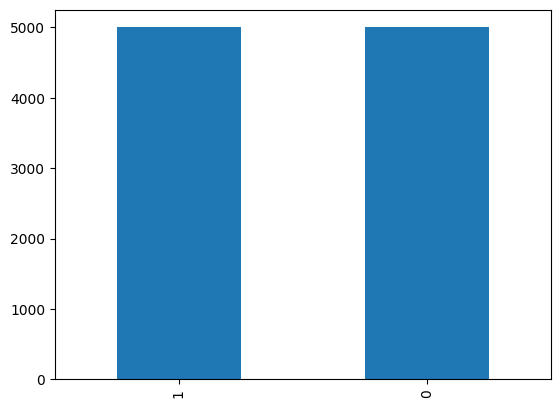

In [ ]:
data['CLASS_LABEL'].value_counts().plot(kind='bar')

##Verificacion de datos nulos en las columnas

In [ ]:
data.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


##Imprimir el CLASS_LABEL

In [ ]:
print(data['CLASS_LABEL'].value_counts())

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64


##Separación de x & y de CLASS_LABEL

In [ ]:
X = data.drop('CLASS_LABEL', axis=1).values
Y = data['CLASS_LABEL'].values
print (X.shape , Y.shape)

(10000, 48) (10000,)


##Decision tree

In [ ]:
def experimentar_dt(depths,X, Y):
    """funcion que realiza experimentos de arboles de decision
    depths: list[int] lista con la profundidad de arboles a experimentar
    normalize bool: indica si se aplica normalización a los datos
    X: matriz con las caractersiticas
    Y: matriz de numpy con etiquetas
    retorna: dataframe con:
        - profunidad de los arboles
        - eficiencia de entrenamiento
        - desviacion de estandar eficiencia de entrenamiento
        - eficiencia de prueba
        - desviacion estandar eficiencia de prueba
    """
    folds = 10
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for depth in depths:
        EficienciaTrain = []
        EficienciaVal = []
        Macc = []
        Mf1 = []
        for train, test in skf.split(X, Y):
            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]

            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            modelo = DecisionTreeClassifier(max_depth=depth)
            modelo = modelo.fit(Xtrain, Ytrain)
            #predecir muestras de entrenamiento
            Ytrain_pred = modelo.predict(Xtrain)
            #predecir muestras de pruebas
            Yest = modelo.predict(Xtest)
            #Evaluamos las predicciones del modelo con los datos de test
            EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
            EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
            Macc.append(accuracy_score(Ytest, Yest))
            #Mf1.append(f1_score(Ytest, Yest))

        resultados.loc[idx,'profundidad del arbol'] = depth
        resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
        resultados.loc[idx,'accuracy'] = np.mean(Macc)
        #resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        idx= idx +1

    return (resultados)

#Resultados del entrenamiento

In [ ]:
resultados_dt = experimentar_dt([3,10,50,100],MinMaxScaler().fit_transform(X), Y)
resultados_dt

,profundidad del arbol,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,accuracy
0,3.0,0.942922,0.002025,0.9369,0.017541,0.9369
1,10.0,0.987411,0.000781,0.9560,0.008099,0.9560
2,50.0,1.000000,0.000000,0.9455,0.016336,0.9455
3,100.0,1.000000,0.000000,0.9475,0.014699,0.9475


In [ ]:
remove_n = 3000
drop_indices = np.random.choice(data.index, remove_n, replace=False)
df_subset = data.drop(drop_indices)

X = df_subset.drop('CLASS_LABEL', axis=1).values
Y = df_subset['CLASS_LABEL'].values
print (X.shape , Y.shape)

(7000, 48) (7000,)


In [ ]:
resultados_dt = experimentar_dt([3,10,20,100],MinMaxScaler().fit_transform(X), Y)
resultados_dt

,profundidad del arbol,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,accuracy
0,3.0,0.942206,0.001722,0.940143,0.014714,0.940143
1,10.0,0.988222,0.000939,0.945429,0.011281,0.945429
2,20.0,1.000000,0.000000,0.939429,0.013328,0.939429
3,100.0,1.000000,0.000000,0.942143,0.014246,0.942143


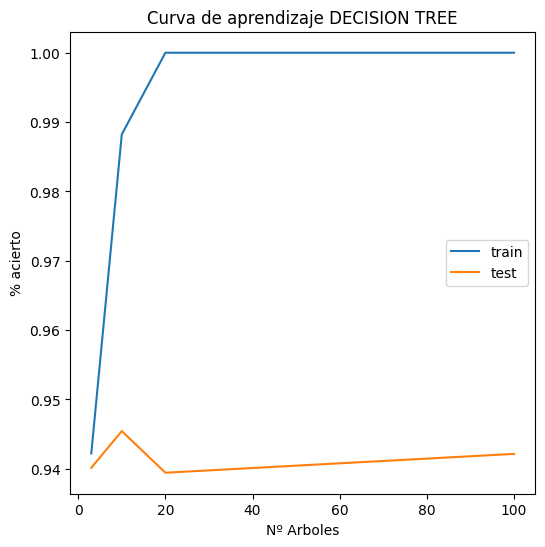

In [ ]:
plt.plot(resultados_dt['profundidad del arbol'], resultados_dt['eficiencia de entrenamiento'], label="train")
plt.plot(resultados_dt['profundidad del arbol'], resultados_dt['eficiencia de prueba'], label="test")
plt.xlabel("Nº Arboles")
plt.ylabel("% acierto")

plt.legend()
plt.title('Curva de aprendizaje DECISION TREE')
plt.rcParams["figure.figsize"] = (6,6)

#Random forest



In [ ]:
def experimentar_rf(num_trees,numero_de_variables, X, Y):
    folds = 10
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for trees in num_trees:
        for num_variables in numero_de_variables:
            EficienciaTrain = []
            EficienciaVal = []
            Macc = []
            Mpre = []
            Mrec = []
            Mf1 = []
            for train, test in skf.split(X, Y):
                Xtrain = X[train,:]
                Ytrain = Y[train]
                Xtest = X[test,:]
                Ytest = Y[test]
                modelo = RandomForestClassifier(n_estimators=trees, max_features=num_variables, criterion="gini")
                modelo.fit(Xtrain,Ytrain)
                Ytrain_pred = modelo.predict(Xtrain)
                Yest = modelo.predict(Xtest)
                EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
                Macc.append(accuracy_score(Ytest, Yest))
                Mf1.append(f1_score(Ytest, Yest))



            resultados.loc[idx,'número de arboles'] = trees
            resultados.loc[idx,'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
            resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
            resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
            resultados.loc[idx,'accuracy real'] = np.mean(Macc)
            resultados.loc[idx,'f1_score'] = np.mean(Mf1)
            idx= idx +1
        print(f"termina para {trees} arboles")
        
    return (resultados)

#Resultados del entrenamiento

In [ ]:
arboles = [5,10,20,50,100,150]
variables_seleccion = [5]
resultados_rf = experimentar_rf(arboles, variables_seleccion, X, Y)
resultados_rf

termina para 5 arboles
termina para 10 arboles
termina para 20 arboles
termina para 50 arboles
termina para 100 arboles
termina para 150 arboles


,número de arboles,variables para la selección del mejor umbral,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,f1_score
0,5.0,5.0,0.997222,0.000508,0.956143,0.010421,0.956143,0.554659
1,10.0,5.0,0.999127,0.000415,0.962000,0.019485,0.962000,0.565779
2,20.0,5.0,0.999794,0.000225,0.966714,0.010615,0.966714,0.564710
3,50.0,5.0,0.999984,0.000048,0.969143,0.011679,0.969143,0.570742
4,100.0,5.0,1.000000,0.000000,0.968571,0.012825,0.968571,0.566683
5,150.0,5.0,1.000000,0.000000,0.971000,0.010881,0.971000,0.569406


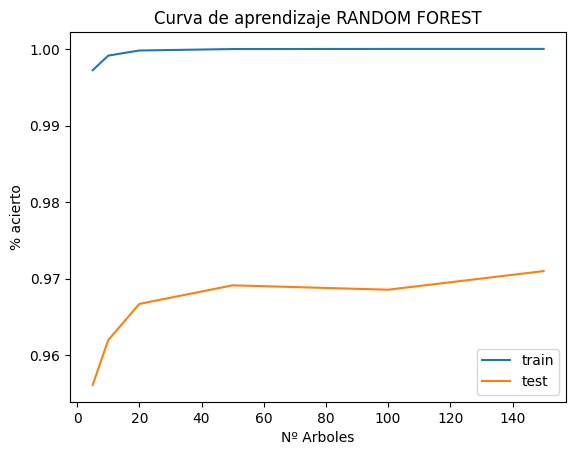

In [ ]:
plt.plot(resultados_rf['número de arboles'], resultados_rf['eficiencia de entrenamiento'], label="train")
plt.plot(resultados_rf['número de arboles'], resultados_rf['eficiencia de prueba'], label="test")
plt.xlabel("Nº Arboles")
plt.ylabel("% acierto")

plt.legend()
plt.title('Curva de aprendizaje RANDOM FOREST')
plt.rcParams["figure.figsize"] = (6,6)

#Random forest con PCA

In [ ]:
def experimentar_rf_PCA(num_componentes, X, Y):
    folds = 10
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for num_comp in num_componentes:

          EficienciaTrain = []
          EficienciaVal = []
          Mf1 = []
          for train, test in skf.split(X, Y):
              Xtrain = X[train,:]
              Ytrain = Y[train]
              Xtest = X[test,:]
              Ytest = Y[test]

              pca = PCA(n_components=num_comp)
              pca.fit(Xtrain)
              Xtrain = pca.transform(Xtrain)
              Xtest = pca.transform(Xtest)
              modelo = RandomForestClassifier(n_estimators=50, criterion="gini")
              modelo.fit(Xtrain, Ytrain)
              Ytrain_pred = modelo.predict(Xtrain)
              Yest = modelo.predict(Xtest)
              EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
              EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
              Mf1.append(f1_score(Ytest, Yest))

          resultados.loc[idx,'PCA componentes'] = num_comp
          resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
          resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
          resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
          resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
          resultados.loc[idx,'f1_score'] = np.mean(Mf1)
          idx= idx +1
        
    return (resultados)

#Resultados del entrenamiento

In [ ]:
RFresultadosPCA = experimentar_rf_PCA([1,3,5,10,12,15,17,20,23,25,27,29,30,35,40,48],X, Y)
RFresultadosPCA

,PCA componentes,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,f1_score
0,1.0,0.996857,0.000957,0.545143,0.054613,0.555654
1,3.0,0.999714,0.000185,0.687714,0.066912,0.695141
2,5.0,0.999730,0.000160,0.818429,0.044965,0.825262
3,10.0,0.999937,0.000078,0.889571,0.033528,0.892307
4,12.0,0.999921,0.000079,0.909143,0.023449,0.909724
5,15.0,0.999889,0.000124,0.921714,0.014226,0.921872
6,17.0,0.999952,0.000143,0.923571,0.020033,0.923687
7,20.0,0.999937,0.000105,0.928143,0.021703,0.928338
8,23.0,0.999984,0.000048,0.931857,0.018845,0.931998
9,25.0,0.999984,0.000048,0.939857,0.017255,0.939836


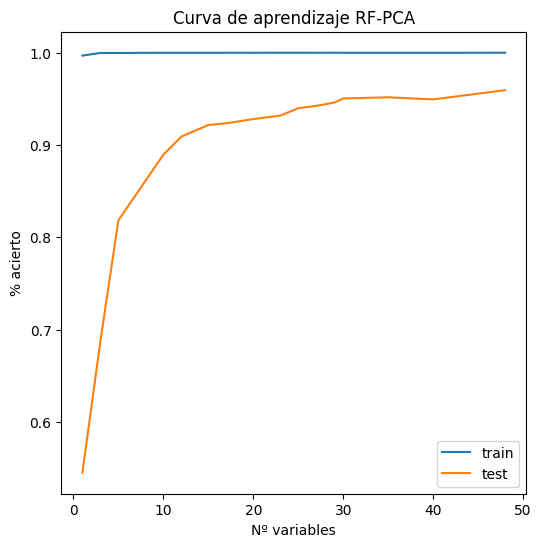

In [ ]:
plt.plot(RFresultadosPCA['PCA componentes'], RFresultadosPCA['eficiencia de entrenamiento'], label="train")
plt.plot(RFresultadosPCA['PCA componentes'], RFresultadosPCA['eficiencia de prueba'], label="test")
plt.xlabel("Nº variables")
plt.ylabel("% acierto")

plt.legend()
plt.title('Curva de aprendizaje RF-PCA')
plt.rcParams["figure.figsize"] = (6,6)

#Decision tree con PCA

In [ ]:
def experimentar_dt_PCA(num_componentes,depths,X, Y):
    folds = 4
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for num_comp in num_componentes:
      for depth in depths:
          Mf1 = []
          EficienciaTrain = []
          EficienciaVal = []
          for train, test in skf.split(X, Y):
              Xtrain = X[train,:]
              Ytrain = Y[train]
              Xtest = X[test,:]
              Ytest = Y[test]
              pca = PCA(n_components=num_comp)
              pca.fit(Xtrain)
              Xtrain = pca.transform(Xtrain)
              Xtest = pca.transform(Xtest)
              modelo = DecisionTreeClassifier(max_depth=depth)
              modelo = modelo.fit(Xtrain, Ytrain)
              Ytrain_pred = modelo.predict(Xtrain)
              Yest = modelo.predict(Xtest)
              EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
              EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
              Mf1.append(f1_score(Ytest, Yest))

          resultados.loc[idx,'PCA componentes'] = num_comp
          resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
          resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
          resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
          resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
          resultados.loc[idx,'f1_score'] = np.mean(Mf1)
          idx= idx +1
        
    return (resultados)

#Resultados del entrenamiento

In [ ]:
DTresultadosPCA = experimentar_dt_PCA([1,3,5,10,12,15,17,20,23,25,27,29,30,35,40,48],[20], X, Y)
DTresultadosPCA

,PCA componentes,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,f1_score
0,1.0,0.866238,0.032403,0.228000,0.055053,0.220477
1,3.0,0.950190,0.025353,0.411000,0.081037,0.324895
2,5.0,0.994286,0.002020,0.585143,0.130200,0.409797
3,10.0,0.999905,0.000095,0.640143,0.151987,0.445193
4,12.0,0.999381,0.001072,0.685571,0.140126,0.462358
5,15.0,0.999524,0.000547,0.694714,0.137838,0.466411
6,17.0,0.999714,0.000495,0.693714,0.119869,0.459670
7,20.0,0.999810,0.000330,0.691571,0.139977,0.463648
8,23.0,0.999762,0.000412,0.684571,0.136465,0.460777
9,25.0,0.999667,0.000577,0.688857,0.139734,0.460323


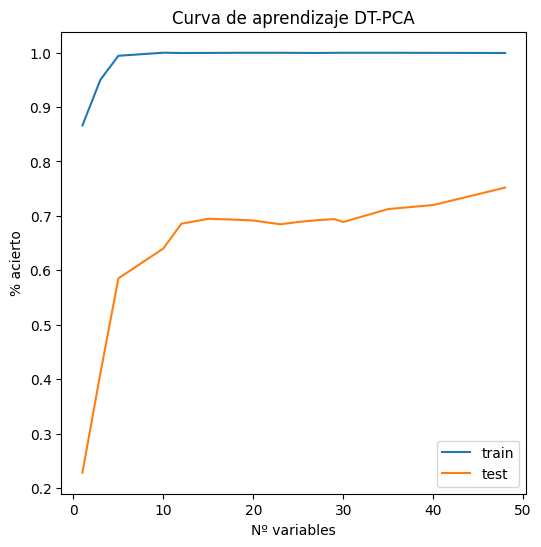

In [ ]:
plt.plot(DTresultadosPCA['PCA componentes'], DTresultadosPCA['eficiencia de entrenamiento'], label="train")
plt.plot(DTresultadosPCA['PCA componentes'], DTresultadosPCA['eficiencia de prueba'], label="test")
plt.xlabel("Nº variables")
plt.ylabel("% acierto")

plt.legend()
plt.title('Curva de aprendizaje DT-PCA')
plt.rcParams["figure.figsize"] = (6,6)